In [48]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers, initializers
from tensorflow import set_random_seed

pd.set_option('display.max_columns', 500)
# set off this warning: A value is trying to be set on a copy of a slice from a DataFrame
pd.set_option('mode.chained_assignment', None)

In [49]:
path_abs = os.path.abspath('.')
path = path_abs + '/data/'

In [50]:
df_dataset_raw = pd.read_csv(path+'final_dataset.csv')

/Users/matthies/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
print("Shape df_dataset_raw: "+str(df_dataset_raw.shape))
df_dataset_raw.head()

Shape df_dataset_raw: (90686, 94)


,scoutId,URL,Timestamp,Schluessel,beschreibung,requirements,group,historicallisting,virtualreality,shown,ads,via,qualified,bln,krs,land,ExclusiveExpose,barrierFree,buildingType,cId,cellar,condition,constructionPhase,courtage,cwId,energyEfficiencyClass,energyType,firingTypes,galleryAd,groupnumber,heatingType,houseNumber,immotype,interiorQual,international,ityp,lastRefurbish,livingSpace,livingSpaceRange,lotArea,newlyConst,noParkSpaces,noRooms,noRoomsRange,numberOfFloors,objectnumber,picture,picturecount,plotAreaRange,pricetrend,pricetrendbuy,pricetrendrent,id,purchasePrice,purchasePriceRange,regio1,regio2,regio3,rented,street,streetPlain,telekomDownloadSpeed,telekomHdTelephone,telekomHybridDownloadSpeed,telekomHybridUploadSpeed,telekomInternet,telekomInternetProductAvailable,telekomInternetProductName,telekomInternetServices,telekomInternetTechnology,telekomInternetType,telekomInternetUrl,telekomInternetUrlMobile,telekomTrackingGroup,telekomTvOffer,telekomUploadSpeed,thermalChar,usableArea,yearConstructed,yearConstructedRange,zipCode,qkm,einwohner,bev_pro_km2,wanderungssaldo16,bevoelkerungsdichte2016,beschaeftigtenquote2016,bevoelkerungsentwicklung2016,bruttoentgelteJeBeschaeftigte2016,geburtenGestorbenenueberschuss2016,verfuegbaresEinkommenJeEinwohner2016,ms_key,ms_65qm,ms_100qm
0,111439855,/expose/111439855,2019-05-10 21:18:10.938789,5316,['Mehrfamilienhaus mit 3 Wohnungen und einem B...,profile0,NaN,False,True,True,ADS1406_ON,standard,NaN,Nordrhein_Westfalen,Leverkusen,Deutschland,False,n,multi_family_house,17339888,n,no_information,no_information,y,009.7f6709d7-64fc-401c-a2b5-bdff8f7c0e43,NaN,NaN,gas,disabled,NaN,central_heating,no_information,haus_kauf,simple,n,"3,active",NaN,258.0,7,230.0,n,NaN,7.0,5,2.0,FC0022-100519,https://pictures.immobilienscout24.de/listings...,53,1,6.77,6.77,0.19,NaN,295000.0,6,Nordrhein_Westfalen,Leverkusen,Hitdorf,n,no_information,no_information,100 MBit/s,True,NaN,NaN,100 MBit/s,True,MagentaZuhause L,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",über VDSL,REGULAR,https://padlock.link/ml,https://padlock.link/ioml,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,NaN,NaN,NaN,NaN,51371,15.109325,29561.0,1956.473899,-6.6,2038.4,56.8,-22.9,68.6,-13.5,20884,Köln,8.55,9.7
1,111439792,/expose/111439792,2019-05-10 21:18:11.642809,3454,['In gewachsener Siedlungslage steht dieses so...,profile0,NaN,False,NaN,True,ADS1406_ON,standard,NaN,Niedersachsen,Emsland_Kreis,Deutschland,True,n,single_family_house,17051077,n,well_kept,completed,y,002.01000552843,E,energy_consumption,gas,NaN,NaN,central_heating,no_information,haus_kauf,no_information,n,"3,active",NaN,136.0,3,1594.0,n,3.0,4.0,4,NaN,8854,https://pictures.immobilienscout24.de/listings...,19,5,9.68,9.68,2.04,NaN,291000.0,6,Niedersachsen,Emsland_Kreis,Emsbüren,n,no_information,no_information,16 MBit/s,True,50 MBit/s,10 MBit/s,50 MBit/s,True,MagentaZuhause M Hybrid (2),"web,email,bank,music,dl-ul,game,sd,mltstr,hd",über Hybrid,WITH_HYBRID,https://padlock.link/mmhy2,https://padlock.link/mmh2sa,telekom_layer_magenta_m_hybrid2,ONE_YEAR_FREE,"2,4 MBit/s",154.0,NaN,1980.0,3.0,48488,140.069215,9780.0,69.822623,59.9,108.6,57.5,59.4,41.1,3.2,20469,NaN,NaN,NaN
2,111439750,/expose/111439750,2019-05-10 21:18:12.357044,5334,['Massive DHH in hervorragender Wohngegend\r\n...,profile0,NaN,False,NaN,True,ADS1406_ON,standard,NaN,Nordrhein_Westfalen,Aachen_Kreis,Deutschland,True,n,semidetached_house,18328654,y,well_kept,completed,y,002.01009149369,C,energy_consumption,gas,NaN,NaN,central_heating,no_information,haus_kauf,no_information,n,"3,active",NaN,155.0,4,464.0,n,3.0,5.0,5,NaN,46280107-02752,https://pictures.immobilienscout24.de/listings...,10,2,6.76,6.76,2.27,NaN,410000.0,8,Nordrhein_Westfalen,Aachen_Kreis,Alsdorf,n,no_information,no_information,16 MBit/s,True,50 MBit/s,10 MBit/s,50 MBit/s,True,MagentaZuhause M Hybrid (2),"web,email,bank,music,dl-ul,game,sd,mltstr,hd",über Hybrid,WITH_HYBRID,https://padlock.link/mmhy2,https://padlock.link/mmh2sa,telekom_layer_magenta_

In [52]:
df_dataset_raw.columns

Index(['scoutId', 'URL', 'Timestamp', 'Schluessel', 'beschreibung',
       'requirements', 'group', 'historicallisting', 'virtualreality', 'shown',
       'ads', 'via', 'qualified', 'bln', 'krs', 'land', 'ExclusiveExpose',
       'barrierFree', 'buildingType', 'cId', 'cellar', 'condition',
       'constructionPhase', 'courtage', 'cwId', 'energyEfficiencyClass',
       'energyType', 'firingTypes', 'galleryAd', 'groupnumber', 'heatingType',
       'houseNumber', 'immotype', 'interiorQual', 'international', 'ityp',
       'lastRefurbish', 'livingSpace', 'livingSpaceRange', 'lotArea',
       'newlyConst', 'noParkSpaces', 'noRooms', 'noRoomsRange',
       'numberOfFloors', 'objectnumber', 'picture', 'picturecount',
       'plotAreaRange', 'pricetrend', 'pricetrendbuy', 'pricetrendrent', 'id',
       'purchasePrice', 'purchasePriceRange', 'regio1', 'regio2', 'regio3',
       'rented', 'street', 'streetPlain', 'telekomDownloadSpeed',
       'telekomHdTelephone', 'telekomHybridDownloadSpeed',


In [53]:
interesting_features = ['scoutId', 'zipCode', 'Schluessel', 'bln', 'krs', 'purchasePrice', 'buildingType', 'cellar', 
                        'condition', 'energyEfficiencyClass', 'firingTypes', 'heatingType', 'interiorQual', 
                        'lastRefurbish', 'livingSpace', 'lotArea', 'noParkSpaces', 'noRooms', 'numberOfFloors', 
                        'picturecount', 'pricetrend', 'pricetrendbuy', 'pricetrendrent', 'rented', 'telekomInternet', 
                        'thermalChar', 'usableArea', 'yearConstructed', 'yearConstructedRange', 'qkm', 'einwohner', 
                        'bev_pro_km2', 'wanderungssaldo16', 'bevoelkerungsdichte2016', 'beschaeftigtenquote2016', 
                        'bevoelkerungsentwicklung2016', 'bruttoentgelteJeBeschaeftigte2016', 'geburtenGestorbenenueberschuss2016', 
                        'verfuegbaresEinkommenJeEinwohner2016', 'ms_key', 'ms_65qm', 'ms_100qm']

df_raw = df_dataset_raw[interesting_features]
print("shape df_raw: "+str(df_raw.shape))

shape df_raw: (90686, 42)


In [54]:
df_raw.dtypes

scoutId                                   int64
zipCode                                   int64
Schluessel                                int64
bln                                      object
krs                                      object
purchasePrice                           float64
buildingType                             object
cellar                                   object
condition                                object
energyEfficiencyClass                    object
firingTypes                              object
heatingType                              object
interiorQual                             object
lastRefurbish                           float64
livingSpace                             float64
lotArea                                 float64
noParkSpaces                            float64
noRooms                                 float64
numberOfFloors                          float64
picturecount                              int64
pricetrend                              

In [55]:
df_raw.head()

,scoutId,zipCode,Schluessel,bln,krs,purchasePrice,buildingType,cellar,condition,energyEfficiencyClass,firingTypes,heatingType,interiorQual,lastRefurbish,livingSpace,lotArea,noParkSpaces,noRooms,numberOfFloors,picturecount,pricetrend,pricetrendbuy,pricetrendrent,rented,telekomInternet,thermalChar,usableArea,yearConstructed,yearConstructedRange,qkm,einwohner,bev_pro_km2,wanderungssaldo16,bevoelkerungsdichte2016,beschaeftigtenquote2016,bevoelkerungsentwicklung2016,bruttoentgelteJeBeschaeftigte2016,geburtenGestorbenenueberschuss2016,verfuegbaresEinkommenJeEinwohner2016,ms_key,ms_65qm,ms_100qm
0,111439855,51371,5316,Nordrhein_Westfalen,Leverkusen,295000.0,multi_family_house,n,no_information,NaN,gas,central_heating,simple,NaN,258.0,230.0,NaN,7.0,2.0,53,6.77,6.77,0.19,n,100 MBit/s,NaN,NaN,NaN,NaN,15.109325,29561.0,1956.473899,-6.6,2038.4,56.8,-22.9,68.6,-13.5,20884,Köln,8.55,9.7
1,111439792,48488,3454,Niedersachsen,Emsland_Kreis,291000.0,single_family_house,n,well_kept,E,gas,central_heating,no_information,NaN,136.0,1594.0,3.0,4.0,NaN,19,9.68,9.68,2.04,n,50 MBit/s,154.0,NaN,1980.0,3.0,140.069215,9780.0,69.822623,59.9,108.6,57.5,59.4,41.1,3.2,20469,NaN,NaN,NaN
2,111439750,52477,5334,Nordrhein_Westfalen,Aachen_Kreis,410000.0,semidetached_house,y,well_kept,C,gas,central_heating,no_information,NaN,155.0,464.0,3.0,5.0,NaN,10,6.76,6.76,2.27,n,50 MBit/s,98.0,55.0,1993.0,5.0,31.654418,46553.0,1470.663590,-3.1,800.1,51.1,-26.2,49.8,-14.9,19781,Alsdorf,6.00,5.4
3,111439851,31241,3157,Niedersachsen,Peine_Kreis,299000.0,single_family_house,y,modernized,E,gas,central_heating,no_information,NaN,130.0,1010.0,1.0,7.0,2.0,37,6.94,6.94,1.19,n,100 MBit/s,159.5,50.0,1965.0,2.0,28.994730,11523.0,397.417048,77.6,245.8,59.2,49.7,41.3,-27.2,21203,Ilsede,NaN,NaN
4,111439746,52457,5358,Nordrhein_Westfalen,Düren_Kreis,320000.0,single_family_house,y,well_kept,C,gas,central_heating,no_information,2011.0,102.0,649.0,3.0,4.0,NaN,8,7.67,7.67,1.19,n,50 MBit/s,98.0,55.0,NaN,NaN,44.093991,13751.0,311.856552,1.0,284.4,54.4,-28.8,45.8,-22.8,20526,"Aldenhofen, Gemeinde",NaN,NaN


In [56]:
def replace_shit(x, to_replace, replace_by):
    if isinstance(x, str):
        return [float(s) for s in x.split() if s.isdigit()][0]
    else:
        return np.nan
    
df_raw.telekomInternet = df_raw.apply(lambda x: replace_shit(x['telekomInternet'], ' MBit/s', ''), axis=1)

# Univariate Analysis

In [57]:
continuous_columns = ['purchasePrice', 'lastRefurbish', 'livingSpace', 'lotArea', 'noParkSpaces', 
                      'noRooms', 'numberOfFloors', 'picturecount', 'pricetrend', 'pricetrendbuy', 
                      'pricetrendrent', 'telekomInternet', 'thermalChar', 'usableArea', 'yearConstructed', 
                      'yearConstructedRange', 'qkm', 'einwohner', 'bev_pro_km2', 'wanderungssaldo16', 
                      'bevoelkerungsdichte2016', 'beschaeftigtenquote2016', 'bevoelkerungsentwicklung2016', 
                      'bruttoentgelteJeBeschaeftigte2016', 'geburtenGestorbenenueberschuss2016', 
                      'verfuegbaresEinkommenJeEinwohner2016', 'ms_65qm', 'ms_100qm']
categorial_columns = ['buildingType', 'cellar', 'condition',  'energyEfficiencyClass', 'firingTypes', 
                      'heatingType', 'interiorQual', 'rented']

## Continuous Variables
understand the central tendency and spread of the variable

Central Tendency:
- Mean
- Median
- Min
- Max

Measurement of Disperation:
- Range
- Quartile
- IQR
- Variance
- Standard Deviation
- Skewness and Kurtosis

Visualization:
- Histogram
- Boxplot

In [58]:
def univariant_analysis_continuous(df, column_name, boxplot = True):
    five_percent = df[column_name].quantile(q=0.05)
    print("5% Quantile: " + str(five_percent))
    
    first_quartile = df[column_name].quantile(q=0.25)
    print("25% Quantile: " + str(first_quartile))
    
    second_quartile = df[column_name].quantile(q=0.5)
    print("50% Quantile: " + str(second_quartile))
    
    third_quartile = df[column_name].quantile(q=0.75)
    print("75% Quantile: " + str(third_quartile))
    
    ninety_five_percent = df[column_name].quantile(q=0.95)
    print("95% Quantile: " + str(ninety_five_percent))
    
    std_dev = df[column_name].std(axis=0)
    print("Std_dev: " + str(std_dev))
    
    skew = df[column_name].skew(axis=0)
    print("Skewness: " + str(skew))
    
    kurtosis = df[column_name].kurtosis(axis=0)
    print("Kurtosis: " + str(kurtosis))
    
    mean = df[column_name].mean(axis=0)
    print("Mean: " + str(mean))

    median = df[column_name].median(axis=0)
    print("Median: " + str(median))

    max_val = df[column_name].max(axis=0, skipna=True)
    print("Max: " + str(max_val))

    min_val = df[column_name].min(axis=0, skipna=True)
    print("Min: " + str(min_val))
    
    relative_nan = (df[column_name].isna().sum())/len(df[column_name])
    print("Nan's (relative): {}%".format(relative_nan))
    
    print("Name: " + column_name + ', dtype: ' + str(df[column_name].dtypes))
    
    if boxplot:
        df_selected_by_quartile = df.loc[(df[column_name] > five_percent) & (df[column_name] < ninety_five_percent)]
        plt.boxplot(df_selected_by_quartile[column_name])
        plt.show()

### Describe Bundesland

In [59]:
states = ['Nordrhein_Westfalen', 'Niedersachsen', 'Bayern', 
          'Baden_Württemberg', 'Rheinland_Pfalz', 'Hessen', 
          'Schleswig_Holstein', 'Sachsen', 'Brandenburg', 
          'Mecklenburg_Vorpommern', 'Sachsen_Anhalt', 'Saarland', 
          'Thüringen', 'Berlin', 'Hamburg', 'Bremen']

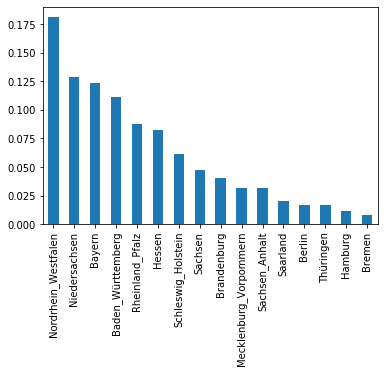

In [60]:
df_raw.bln.value_counts(normalize=True).plot(kind="bar")

### Describe all other continuous variables

5% Quantile: 69000.0
25% Quantile: 218000.0
50% Quantile: 350000.0
75% Quantile: 556825.25
95% Quantile: 1299000.0
Std_dev: 33228846.4975051
Skewness: 300.5114685491085
Kurtosis: 90430.10102423289
Mean: 605032.8511961052
Median: 350000.0
Max: 10000000000.0
Min: 0.0
Nan's (relative): 0.0%
Name: purchasePrice, dtype: float64


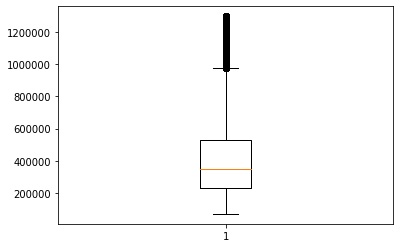

###############################

5% Quantile: 1990.0
25% Quantile: 2004.0
50% Quantile: 2013.0
75% Quantile: 2017.0
95% Quantile: 2019.0
Std_dev: 16.335500605640508
Skewness: -0.7528358515971915
Kurtosis: 1937.673346200199
Mean: 2009.1398282228954
Median: 2013.0
Max: 3003.0
Min: 1018.0
Nan's (relative): 0.7342368171492843%
Name: lastRefurbish, dtype: float64


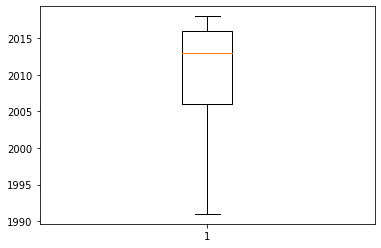

###############################

5% Quantile: 88.0
25% Quantile: 125.65
50% Quantile: 160.8
75% Quantile: 230.0475
95% Quantile: 442.4775
Std_dev: 1037.188754818537
Skewness: 201.93936868857335
Kurtosis: 43438.23689762977
Mean: 212.51887634254462
Median: 160.8
Max: 241000.0
Min: 0.0
Nan's (relative): 0.0%
Name: livingSpace, dtype: float64


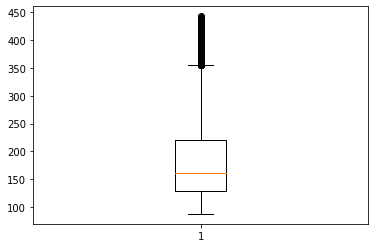

###############################

5% Quantile: 167.0
25% Quantile: 380.0
50% Quantile: 640.0
75% Quantile: 1004.0
95% Quantile: 3379.25
Std_dev: 10502.924650987356
Skewness: 70.82676165508023
Kurtosis: 8094.003172334721
Mean: 1488.9945202126019
Median: 640.0
Max: 1610000.0
Min: 0.0
Nan's (relative): 0.0%
Name: lotArea, dtype: float64


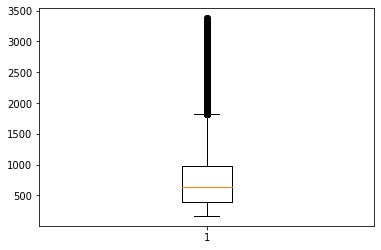

###############################

5% Quantile: 1.0
25% Quantile: 1.0
50% Quantile: 2.0
75% Quantile: 3.0
95% Quantile: 6.0
Std_dev: 10.490406341822638
Skewness: 190.89530665054548
Kurtosis: 41190.6392992959
Mean: 2.5794640630011045
Median: 2.0
Max: 2300.0
Min: 0.0
Nan's (relative): 0.38109520763954746%
Name: noParkSpaces, dtype: float64


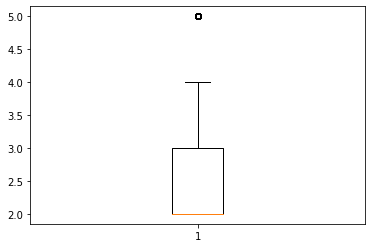

###############################

5% Quantile: 3.0
25% Quantile: 4.5
50% Quantile: 6.0
75% Quantile: 8.0
95% Quantile: 15.0
Std_dev: 8.720467721638926
Skewness: 57.69071608195897
Kurtosis: 5795.7657071160265
Mean: 7.094520653684142
Median: 6.0
Max: 999.0
Min: 1.0
Nan's (relative): 0.0%
Name: noRooms, dtype: float64


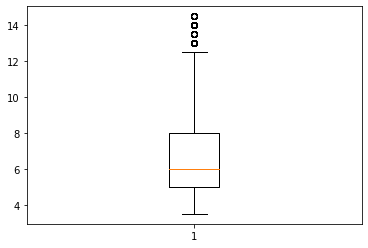

###############################

5% Quantile: 1.0
25% Quantile: 2.0
50% Quantile: 2.0
75% Quantile: 3.0
95% Quantile: 4.0
Std_dev: 2.1783012118036837
Skewness: 100.14134665709669
Kurtosis: 13058.500563982663
Mean: 2.271747695217083
Median: 2.0
Max: 333.0
Min: 0.0
Nan's (relative): 0.44022230553778974%
Name: numberOfFloors, dtype: float64


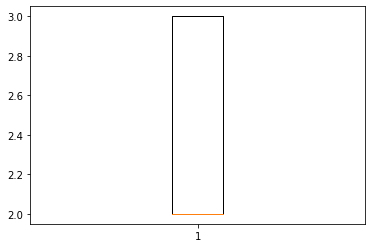

###############################

5% Quantile: 1.0
25% Quantile: 8.0
50% Quantile: 14.0
75% Quantile: 20.0
95% Quantile: 35.0
Std_dev: 10.961283356057306
Skewness: 1.949324172304156
Kurtosis: 9.122091261291958
Mean: 15.261672143440002
Median: 14.0
Max: 150
Min: 0
Nan's (relative): 0.0%
Name: picturecount, dtype: int64


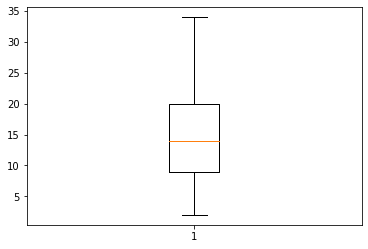

###############################

5% Quantile: 1.95
25% Quantile: 5.98
50% Quantile: 7.95
75% Quantile: 9.96
95% Quantile: 13.55
Std_dev: 3.512502913963326
Skewness: -0.16462053543575336
Kurtosis: 1.4322278018788248
Mean: 7.930353037658233
Median: 7.95
Max: 24.4
Min: -11.2
Nan's (relative): 0.1663432062280837%
Name: pricetrend, dtype: float64


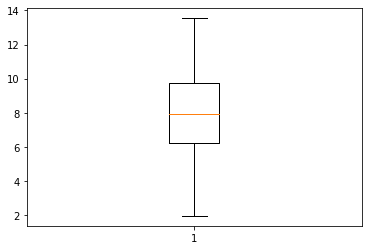

###############################

5% Quantile: 1.99
25% Quantile: 5.99
50% Quantile: 7.96
75% Quantile: 9.96
95% Quantile: 13.57
Std_dev: 3.5037216884649083
Skewness: -0.15279000653298735
Kurtosis: 1.4223324224308063
Mean: 7.942613169821382
Median: 7.96
Max: 24.4
Min: -11.2
Nan's (relative): 0.17274992832410735%
Name: pricetrendbuy, dtype: float64


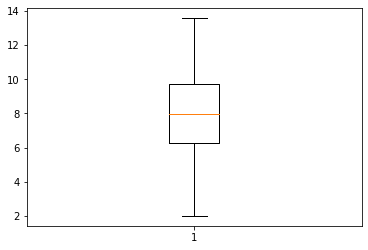

###############################

5% Quantile: -2.84
25% Quantile: 1.68
50% Quantile: 3.62
75% Quantile: 5.14
95% Quantile: 7.95
Std_dev: 3.4386555637604075
Skewness: -0.4993080949932392
Kurtosis: 4.371253099836474
Mean: 3.2621351316468767
Median: 3.62
Max: 30.25
Min: -22.12
Nan's (relative): 0.14562335972476456%
Name: pricetrendrent, dtype: float64


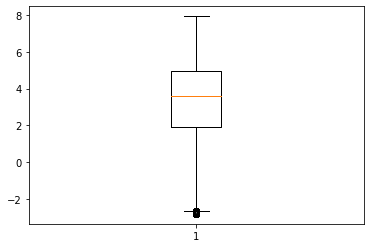

###############################

5% Quantile: 16.0
25% Quantile: 50.0
50% Quantile: 100.0
75% Quantile: 100.0
95% Quantile: 100.0
Std_dev: 36.21190766427643
Skewness: 1.9558682024746976
Kurtosis: 18.669186037443694
Mean: 75.35891535198381
Median: 100.0
Max: 384.0
Min: 2.0
Nan's (relative): 0.20457402465650706%
Name: telekomInternet, dtype: float64


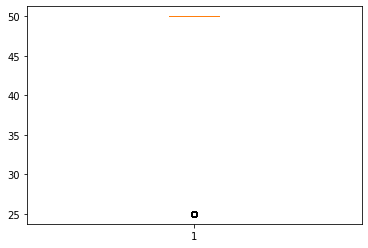

###############################

5% Quantile: 32.03150000000001
25% Quantile: 95.0
50% Quantile: 144.6
75% Quantile: 208.0
95% Quantile: 329.0
Std_dev: 96.09163583747316
Skewness: 2.125010743213178
Kurtosis: 19.42203725733747
Mean: 159.33408555960926
Median: 144.6
Max: 1999.99
Min: 0.01
Nan's (relative): 0.4378184063692301%
Name: thermalChar, dtype: float64


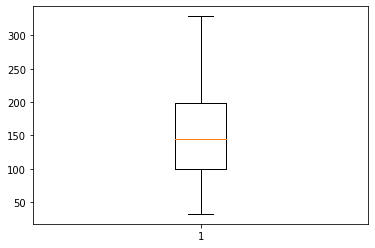

###############################

5% Quantile: 12.0
25% Quantile: 44.0
50% Quantile: 80.0
75% Quantile: 143.0
95% Quantile: 396.0
Std_dev: 539.4528402754804
Skewness: 52.038075593430015
Kurtosis: 3378.0124907535123
Mean: 136.7407063931571
Median: 80.0
Max: 43053.0
Min: 0.0
Nan's (relative): 0.5758661755949099%
Name: usableArea, dtype: float64


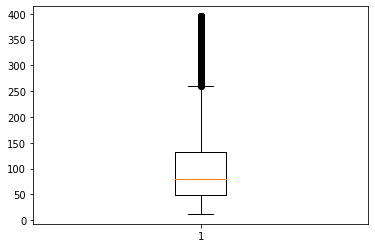

###############################

5% Quantile: 1886.0
25% Quantile: 1937.0
50% Quantile: 1972.0
75% Quantile: 1999.0
95% Quantile: 2019.0
Std_dev: 57.07274385653488
Skewness: 0.7480541200403649
Kurtosis: 202.04905625353376
Mean: 1962.3482523763191
Median: 1972.0
Max: 5410.0
Min: 1000.0
Nan's (relative): 0.11600467547361225%
Name: yearConstructed, dtype: float64


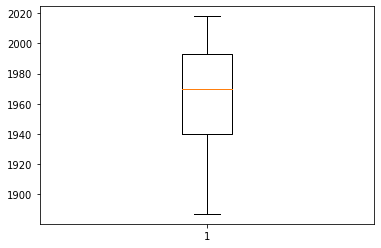

###############################

5% Quantile: 1.0
25% Quantile: 1.0
50% Quantile: 3.0
75% Quantile: 5.0
95% Quantile: 9.0
Std_dev: 2.750352525272441
Skewness: 0.832825450099514
Kurtosis: -0.633936304422253
Mean: 3.6656687373699572
Median: 3.0
Max: 9.0
Min: 1.0
Nan's (relative): 0.11600467547361225%
Name: yearConstructedRange, dtype: float64


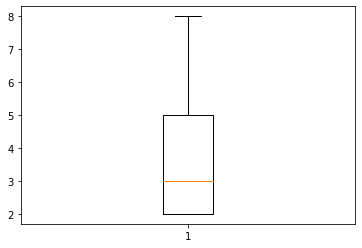

###############################

5% Quantile: 6.1493730000000015
25% Quantile: 20.407066
50% Quantile: 43.790439
75% Quantile: 80.712574
95% Quantile: 182.10711799999996
Std_dev: 69.05482370523967
Skewness: 3.5344418195309673
Kurtosis: 22.232772782994203
Mean: 63.20271226211752
Median: 43.790439
Max: 891.885953
Min: 0.46930900000000003
Nan's (relative): 0.005359151357431136%
Name: qkm, dtype: float64


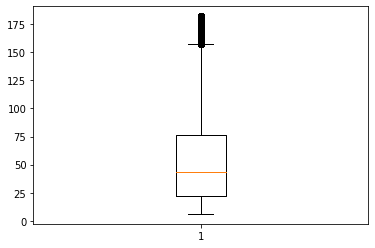

###############################

5% Quantile: 2340.0
25% Quantile: 7063.0
50% Quantile: 13868.0
75% Quantile: 21658.0
95% Quantile: 37735.0
Std_dev: 10732.185558845791
Skewness: 0.9473373557976605
Kurtosis: 0.7071804016364678
Mean: 15721.880776053215
Median: 13868.0
Max: 58826.0
Min: 14.0
Nan's (relative): 0.005359151357431136%
Name: einwohner, dtype: float64


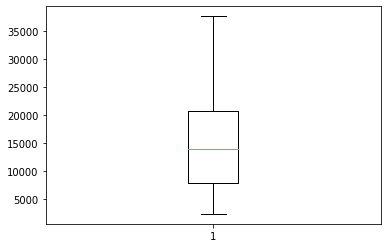

###############################

5% Quantile: 48.01107767335862
25% Quantile: 118.13856948310159
50% Quantile: 258.454298931249
75% Quantile: 709.1155948953058
95% Quantile: 2953.4751830179825
Std_dev: 1227.256795457456
Skewness: 5.005874336386949
Kurtosis: 41.12433228837541
Mean: 695.760350291376
Median: 258.454298931249
Max: 26718.627018102936
Min: 6.7628962392983185
Nan's (relative): 0.005359151357431136%
Name: bev_pro_km2, dtype: float64


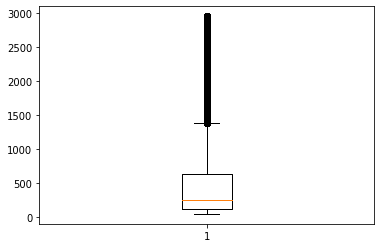

###############################

5% Quantile: -34.6
25% Quantile: 21.2
50% Quantile: 58.2
75% Quantile: 91.3
95% Quantile: 127.8
Std_dev: 53.452708484976476
Skewness: -0.4066947350804407
Kurtosis: 1.7304814570942533
Mean: 54.15519815627551
Median: 58.2
Max: 343.6
Min: -397.1
Nan's (relative): 0.0%
Name: wanderungssaldo16, dtype: float64


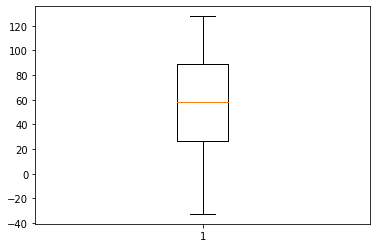

###############################

5% Quantile: 77.1
25% Quantile: 123.4
50% Quantile: 198.3
75% Quantile: 426.3
95% Quantile: 1216.3
Std_dev: 500.64043256666497
Skewness: 3.6915632091879025
Kurtosis: 17.316494629606517
Mean: 375.5666708834556
Median: 198.3
Max: 4355.3
Min: 38.6
Nan's (relative): 0.04115298943607613%
Name: bevoelkerungsdichte2016, dtype: float64


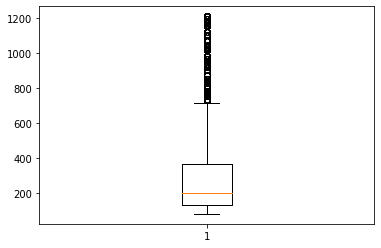

###############################

5% Quantile: 52.2
25% Quantile: 56.5
50% Quantile: 58.5
75% Quantile: 61.2
95% Quantile: 63.7
Std_dev: 5.186335203084088
Skewness: -5.731818322929696
Kurtosis: 60.74861768894614
Mean: 58.233529982577245
Median: 58.5
Max: 67.8
Min: 0.0
Nan's (relative): 0.0%
Name: beschaeftigtenquote2016, dtype: float64


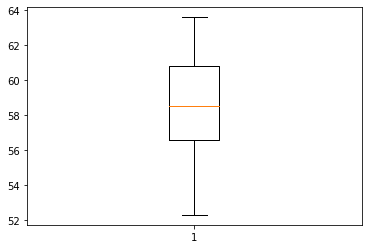

###############################

5% Quantile: -78.1
25% Quantile: -18.3
50% Quantile: 33.7
75% Quantile: 70.6
95% Quantile: 114.9
Std_dev: 63.58943913074237
Skewness: -0.43302770936183965
Kurtosis: 1.1822041700427244
Mean: 26.023371854531018
Median: 33.7
Max: 323.6
Min: -426.9
Nan's (relative): 0.0%
Name: bevoelkerungsentwicklung2016, dtype: float64


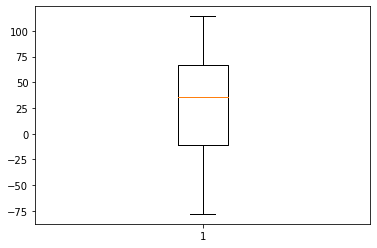

###############################

5% Quantile: 30.0
25% Quantile: 37.0
50% Quantile: 43.1
75% Quantile: 47.3
95% Quantile: 56.5
Std_dev: 8.39951001215484
Skewness: 0.5693018647197956
Kurtosis: 1.2182278758165062
Mean: 42.740416950693024
Median: 43.1
Max: 84.4
Min: 24.7
Nan's (relative): 0.02939814304302759%
Name: bruttoentgelteJeBeschaeftigte2016, dtype: float64


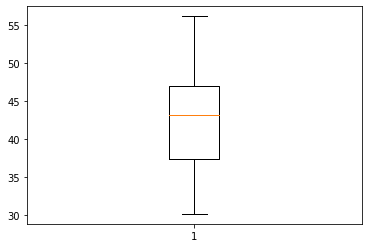

###############################

5% Quantile: -66.5
25% Quantile: -40.4
50% Quantile: -26.1
75% Quantile: -8.4
95% Quantile: 13.0
Std_dev: 23.81656291298489
Skewness: -0.1488473336988868
Kurtosis: -0.03258949496010288
Mean: -25.405792514831397
Median: -26.1
Max: 48.6
Min: -88.4
Nan's (relative): 0.0%
Name: geburtenGestorbenenueberschuss2016, dtype: float64


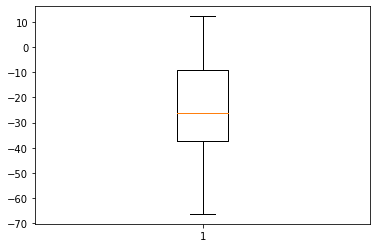

###############################

5% Quantile: 18287.0
25% Quantile: 20068.0
50% Quantile: 21815.0
75% Quantile: 23380.0
95% Quantile: 25295.0
Std_dev: 2445.7093924310634
Skewness: 1.0294085801262862
Kurtosis: 3.4072891455985257
Mean: 21969.154533224533
Median: 21815.0
Max: 34987
Min: 16203
Nan's (relative): 0.0%
Name: verfuegbaresEinkommenJeEinwohner2016, dtype: int64


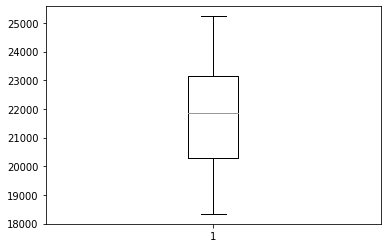

###############################

5% Quantile: 4.3
25% Quantile: 5.428333333333334
50% Quantile: 6.6933333333333325
75% Quantile: 8.03
95% Quantile: 10.09
Std_dev: 1.794190087744628
Skewness: 0.3074474220298443
Kurtosis: -0.6938814204852948
Mean: 6.858674111019875
Median: 6.6933333333333325
Max: 12.76
Min: 1.125
Nan's (relative): 0.5905762741768299%
Name: ms_65qm, dtype: float64


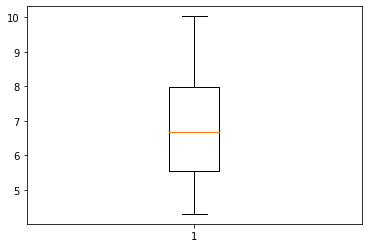

###############################

5% Quantile: 5.03
25% Quantile: 6.08
50% Quantile: 7.12
75% Quantile: 8.66
95% Quantile: 10.59
Std_dev: 1.694972078906966
Skewness: 0.3001952358507131
Kurtosis: -0.8589318394340921
Mean: 7.447587170396149
Median: 7.12
Max: 12.06
Min: 2.65
Nan's (relative): 0.6070837836049666%
Name: ms_100qm, dtype: float64


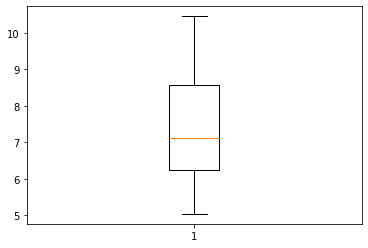

###############################



In [61]:
for column_name in continuous_columns:
    univariant_analysis_continuous(df_raw, column_name)
    print('###############################\n')

In [62]:
def truncate_by_quantile(df, column_name, lower_quantile, upper_quantile):
    """
        lower_quantile, upper_quantile: As decimal number
    """
    lower_quantile_value = df_raw[column_name].quantile(q=lower_quantile)
    upper_quantile_value = df_raw[column_name].quantile(q=upper_quantile)
    print("Quantile {0:.0%}: ".format(lower_quantile) + str(lower_quantile_value))
    print("Quantile {0:.0%}: ".format(upper_quantile) + str(upper_quantile_value))
    
    df = df.loc[(df[column_name] >= lower_quantile_value) & (df[column_name] <= upper_quantile_value) | np.isnan(df[column_name])]
    print("Shape new DataFrame: " + str(df.shape))
    return df

### Remove Outliers

#### purchasePrice 

In [63]:
df_cleaned = truncate_by_quantile(df_raw, 'purchasePrice', 0.05, 0.95)

Quantile 5%: 69000.0
Quantile 95%: 1299000.0
Shape new DataFrame: (81793, 42)


#### lastRefurbish

In [64]:
df_cleaned = truncate_by_quantile(df_cleaned, 'lastRefurbish', 0.01, 0.99)

Quantile 1%: 1974.0
Quantile 99%: 2019.0
Shape new DataFrame: (81558, 42)


How do I handle a renovation that has not been done?  
Replace nan with constructionYear

In [65]:
nan_idx = df_cleaned['lastRefurbish'].index[df_cleaned['lastRefurbish'].apply(np.isnan)]
df_cleaned.lastRefurbish = df_cleaned.lastRefurbish.fillna(df_cleaned.yearConstructed[nan_idx])

#### livingSpace

In [66]:
df_cleaned = truncate_by_quantile(df_cleaned, 'livingSpace', 0.01, 0.99)

Quantile 1%: 53.0
Quantile 99%: 870.8409999999852
Shape new DataFrame: (80708, 42)


#### lotArea

In [67]:
df_cleaned = truncate_by_quantile(df_cleaned, 'lotArea', 0.01, 0.99)

Quantile 1%: 77.0
Quantile 99%: 15269.749999999854
Shape new DataFrame: (79354, 42)


#### noParkSpaces

In [68]:
df_cleaned = truncate_by_quantile(df_cleaned, 'noParkSpaces', 0, 0.99)

Quantile 0%: 0.0
Quantile 99%: 13.0
Shape new DataFrame: (79062, 42)


#### noRooms

In [69]:
df_cleaned = truncate_by_quantile(df_cleaned, 'noRooms', 0, 0.99)

Quantile 0%: 1.0
Quantile 99%: 27.0
Shape new DataFrame: (78871, 42)


#### numberOfFloors

In [70]:
df_cleaned = truncate_by_quantile(df_cleaned, 'numberOfFloors', 0, 0.99)

Quantile 0%: 0.0
Quantile 99%: 4.0
Shape new DataFrame: (78721, 42)


#### usableArea

In [71]:
df_cleaned = truncate_by_quantile(df_cleaned, 'usableArea', 0.01, 0.99)

Quantile 1%: 0.0
Quantile 99%: 900.0
Shape new DataFrame: (78580, 42)


#### yearConstructed

In [72]:
df_cleaned = truncate_by_quantile(df_cleaned, 'yearConstructed', 0.05, 0.99)

Quantile 5%: 1886.0
Quantile 99%: 2020.0
Shape new DataFrame: (75666, 42)


## Categorial Variables
understand the frequency

* conut
* count %

Visualization:
* Bar chart

In [73]:
def univariant_analysis_categorial(df, column_name):
    unique = df[column_name].unique()
    print("Unique Categories: " + str(unique))
    
    top = df[column_name].mode()
    print("Most freq Category: " + str(top.values[0]))
    
    relative_nan = (df[column_name].isna().sum())/len(df[column_name])
    print("Nan's (relative): {}%".format(relative_nan))
    
    print("Name: " + column_name + ', dtype: ' + str(df[column_name].dtypes))
    
    relative_frequency = df[column_name].value_counts(normalize=True)
    relative_frequency.plot(kind="bar")
    plt.show()

### Describe categorial variables

Unique Categories: ['multi_family_house' 'single_family_house' 'semidetached_house'
 'other_real_estate' 'no_information' 'end_terrace_house'
 'mid_terrace_house' 'farmhouse' 'bungalow' 'special_real_estate' 'villa'
 'castle_manor_house']
Most freq Category: single_family_house
Nan's (relative): 0.0%
Name: buildingType, dtype: object


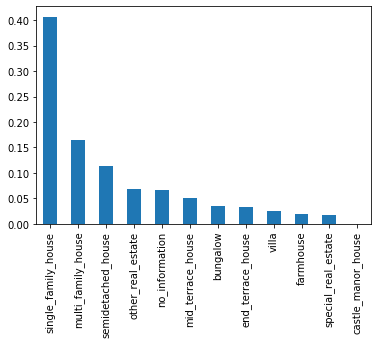

###############################

Unique Categories: ['n' 'y']
Most freq Category: n
Nan's (relative): 0.0%
Name: cellar, dtype: object


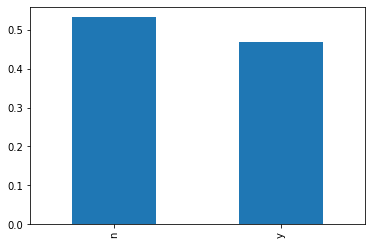

###############################

Unique Categories: ['no_information' 'well_kept' 'modernized'
 'first_time_use_after_refurbishment' 'first_time_use' 'fully_renovated'
 'need_of_renovation' 'refurbished' 'mint_condition' 'negotiable'
 'ripe_for_demolition']
Most freq Category: no_information
Nan's (relative): 0.0%
Name: condition, dtype: object


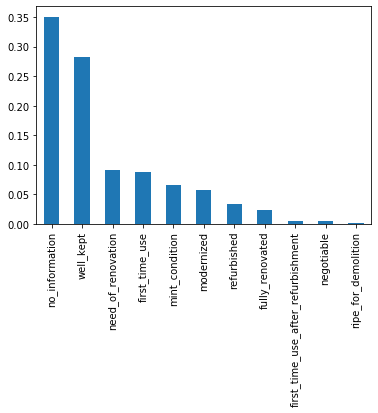

###############################

Unique Categories: [nan 'E' 'C' 'D' 'A' 'A_PLUS' 'B' 'F' 'G' 'NO_INFORMATION' 'H']
Most freq Category: H
Nan's (relative): 0.5567231987296827%
Name: energyEfficiencyClass, dtype: object


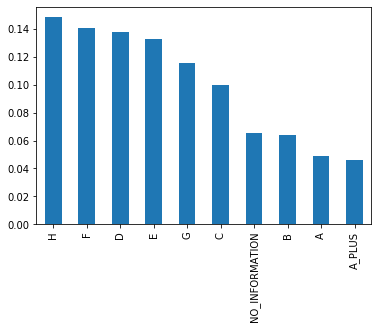

###############################

Unique Categories: ['gas' 'oil:coal' 'electricity' 'oil' 'coal:wood' 'no_information'
 'geothermal' 'gas:wood' 'oil:electricity' 'liquid_gas' 'pellet_heating'
 'solar_heating:gas' 'natural_gas_heavy' 'natural_gas_light' 'wood_chips'
 nan 'coal' 'wood' 'electricity:coal' 'environmental_thermal_energy'
 'solar_heating' 'district_heating' 'solar_heating:oil' 'oil:wood'
 'gas:electricity' 'solar_heating:oil:wood'
 'electricity:environmental_thermal_energy' 'electricity:wood'
 'geothermal:gas' 'pellet_heating:electricity' 'wood:wood_chips'
 'oil:electricity:wood' 'hydro_energy' 'solar_heating:gas:electricity'
 'gas:oil' 'pellet_heating:gas' 'geothermal:solar_heating' 'local_heating'
 'pellet_heating:electricity:wood' 'pellet_heating:oil'
 'solar_heating:district_heating' 'bio_energy' 'geothermal:electricity'
 'district_heating:wood' 'heat_supply'
 'combined_heat_and_power_renewable_energy' 'gas:liquid_gas'
 'solar_heating:liquid_gas' 'gas:coal:wood' 'coal_co

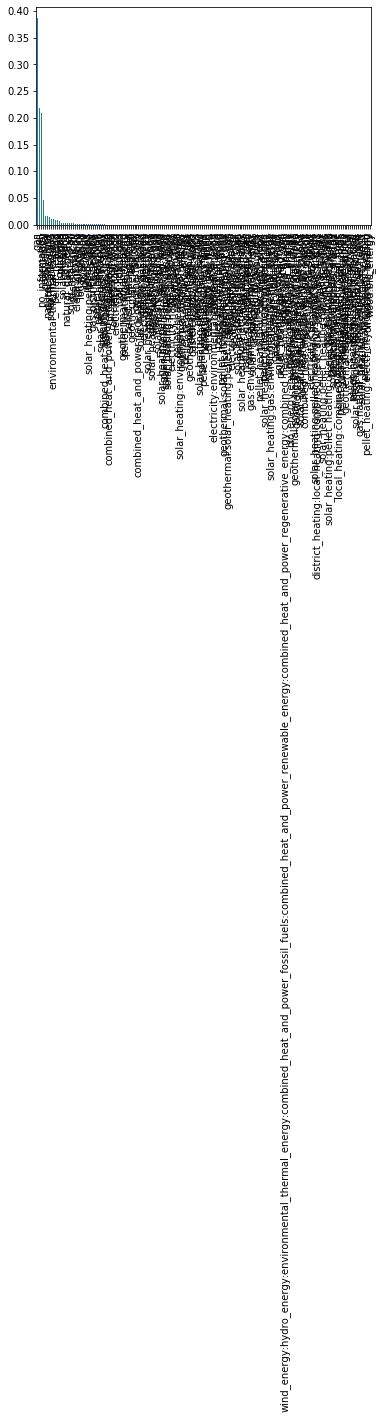

###############################

Unique Categories: ['central_heating' 'floor_heating' 'gas_heating' 'stove_heating' nan
 'self_contained_central_heating' 'oil_heating' 'wood_pellet_heating'
 'heat_pump' 'district_heating' 'no_information'
 'combined_heat_and_power_plant' 'electric_heating' 'night_storage_heater'
 'solar_heating']
Most freq Category: central_heating
Nan's (relative): 0.15221754184769423%
Name: heatingType, dtype: object


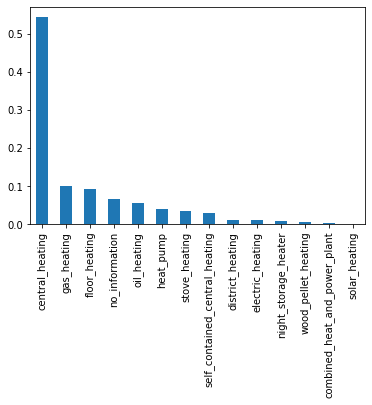

###############################

Unique Categories: ['simple' 'no_information' 'sophisticated' 'normal' 'luxury']
Most freq Category: no_information
Nan's (relative): 0.0%
Name: interiorQual, dtype: object


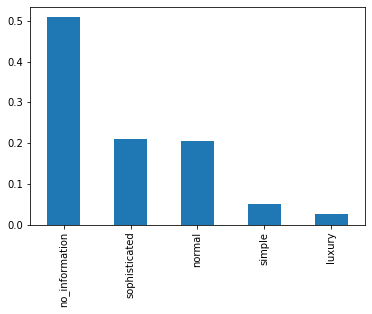

###############################

Unique Categories: ['n' 'y']
Most freq Category: n
Nan's (relative): 0.0%
Name: rented, dtype: object


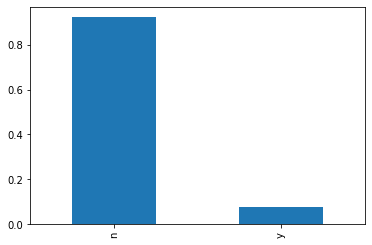

###############################



In [74]:
for column_name in categorial_columns:
    univariant_analysis_categorial(df_raw, column_name)
    print('###############################\n')

### Clean categorial variables

In [75]:
def categorial_str_to_int(df, column_name, dict_identifier, other = True):
    if (df[column_name].dtype == 'int64'):
        return df
    
    for key in dict_identifier:
        # 'other' has to be the last index
        if (key == (len(dict_identifier)-1) and other == True):
            df[column_name][(df[column_name].apply(lambda x: isinstance(x, str)))] = key
        else:
            if isinstance(dict_identifier[key], list):
                for identifier in dict_identifier[key]:
                    df[column_name][(df[column_name] == identifier)] = key
            else:
                df[column_name][(df[column_name] == dict_identifier[key])] = key
    
    df[column_name][df[column_name].isnull()] = 0
    df[column_name] = df[column_name].astype('int64')
        
    return df

In [76]:
# replace n or y with 0 or 1
df_cleaned.cellar = df_cleaned.cellar.replace("n",0).replace("y",1)
df_cleaned.rented = df_cleaned.rented.replace("n",0).replace("y",1)

#### buildingType

In [77]:
relative_frequency = df_cleaned['buildingType'].value_counts(normalize=True)
print(relative_frequency)

single_family_house    0.428515
multi_family_house     0.157045
semidetached_house     0.124851
no_information         0.062049
other_real_estate      0.058745
mid_terrace_house      0.054304
bungalow               0.036384
end_terrace_house      0.035974
villa                  0.017445
special_real_estate    0.012648
farmhouse              0.011934
castle_manor_house     0.000106
Name: buildingType, dtype: float64


* 0: "no_information"
* 1: "single_family_house"
* 2: "multi_family_house"
* 3: "semidetached_house" (Doppelhaus)
* 4: "mid_terrace_house"  (Reihenmittelhaus), "end_terrace_house" (Reihenendhaus)
* 5: "bungalow"
* 6: "other"

In [78]:
dict_buildingType = {0: "no_information",
                      1: "single_family_house", 
                      2: "multi_family_house", 
                      3: "semidetached_house", 
                      4: ["mid_terrace_house", "end_terrace_house"],
                      5: "bungalow",
                      6: "other"}
df_cleaned = categorial_str_to_int(df_cleaned, 'buildingType', dict_buildingType)

#### condition

In [79]:
relative_frequency = df_cleaned['condition'].value_counts(normalize=True)
print(relative_frequency)

no_information                        0.335818
well_kept                             0.299633
first_time_use                        0.096107
need_of_renovation                    0.082970
mint_condition                        0.066120
modernized                            0.058401
refurbished                           0.029723
fully_renovated                       0.022295
negotiable                            0.004137
first_time_use_after_refurbishment    0.004071
ripe_for_demolition                   0.000727
Name: condition, dtype: float64


* 0: "no_information"
* 1: "well_kept"
* 2: "first_time_use"
* 3: "refurbished", "fully_renovated", "mint_condition", "first_time_use_after_refurbishment" (Promblem: mint_condition could be to optimistic)
* 4: "negotiable", "need_of_renovation"
* 5: "ripe_for_demolition" and other

In [80]:
dict_condition = {0: "no_information", 
                     1: "well_kept", 
                     2: "firt_time_use", 
                     3: ["refurbished", "fully_renovated", "mint_condition", "first_time_use_after_refurbishment"],
                     4: ["negotiable", "need_of_renovation"],
                     5: "ripe_for_demolition"}
df_cleaned = categorial_str_to_int(df_cleaned, 'condition', dict_condition)

#### energyEfficiencyClass

In [81]:
relative_frequency = df_cleaned['energyEfficiencyClass'].value_counts(normalize=True)
print(relative_frequency)

F                 0.142440
D                 0.141364
H                 0.136803
E                 0.136208
G                 0.115556
C                 0.100994
NO_INFORMATION    0.064534
B                 0.064336
A                 0.050455
A_PLUS            0.047310
Name: energyEfficiencyClass, dtype: float64


* 0: "NO_INFORMATION"
* 1: "A_PLUS"
* 2: "A"
* 3: "B"
* 4: "C"
* 5: "D"
* 6: "E"
* 7: "F"
* 8: "G"
* 9: "H"

In [82]:
dict_energyEfficiencyClass = {0: "NO_INFORMATION", 
                              1: "A_PLUS", 
                              2: "A", 
                              3: "B", 
                              4: "C", 
                              5: "D", 
                              6: "E", 
                              7: "F", 
                              8: "G", 
                              9: "H"}
df_raw = categorial_str_to_int(df_cleaned, 'energyEfficiencyClass', dict_energyEfficiencyClass)

#### firingTypes

In [83]:
relative_frequency = df_cleaned['firingTypes'].value_counts(normalize=True)
print(relative_frequency)

gas                                              0.401206
oil                                              0.228565
no_information                                   0.190534
electricity                                      0.045828
geothermal                                       0.017249
natural_gas_light                                0.016576
district_heating                                 0.014023
solar_heating:gas                                0.011513
environmental_thermal_energy                     0.011036
pellet_heating                                   0.009157
liquid_gas                                       0.007110
wood                                             0.006703
oil:wood                                         0.003674
solar_heating                                    0.003576
gas:wood                                         0.003183
natural_gas_heavy                                0.002945
solar_heating:oil                                0.002594
gas:oil       

* 0: "no_information"
* 1: "gas"
* 2: "oil"
* 3: "electricity"
* 4: "natural_gas_light"
* 5: "other"

In [84]:
dict_firingTypes = {0: "no_information",
                    1: "gas", 
                    2: "oil", 
                    3: "electricity", 
                    4: "natural_gas_light", 
                    5: "other" }
df_cleaned = categorial_str_to_int(df_cleaned, 'firingTypes', dict_firingTypes)

#### heatingType

In [85]:
relative_frequency = df_cleaned['heatingType'].value_counts(normalize=True)
print(relative_frequency)

central_heating                   0.553319
gas_heating                       0.102456
floor_heating                     0.095853
no_information                    0.060588
oil_heating                       0.056084
heat_pump                         0.043384
self_contained_central_heating    0.027391
stove_heating                     0.024005
district_heating                  0.010785
electric_heating                  0.009544
night_storage_heater              0.007568
wood_pellet_heating               0.004243
combined_heat_and_power_plant     0.003217
solar_heating                     0.001563
Name: heatingType, dtype: float64


* 0: "no_information"
* 1: "central_heating"
* 2: "gas_heating"
* 3: "oil_heating"
* 4: "heat_pump"
* 5: "stove_heating"
* 6: "self_contained_central_heating"
* 7: "other"

In [86]:
dict_heatingType = {0: "no_information", 
                    1: "central_heating", 
                    2: "gas_heating", 
                    3: "oil_heating", 
                    4: "heat_pump", 
                    5: "stove_heating", 
                    6: "self_contained_central_heating", 
                    7: "other"}
df_cleaned = categorial_str_to_int(df_cleaned, 'heatingType', dict_heatingType)

#### interiorQual

In [87]:
relative_frequency = df_cleaned['interiorQual'].value_counts(normalize=True)
print(relative_frequency)

no_information    0.499035
sophisticated     0.225042
normal            0.216464
simple            0.040732
luxury            0.018727
Name: interiorQual, dtype: float64


* 0: "no_information"
* 1: "sophisticated"
* 2: "normal", "simple"
* 3: "luxury"

In [88]:
dict_interiorQual = {0: "no_information", 
                     1: "sophisticated", 
                     2: ["normal", "simple"],
                     3: "luxury"}
df_cleaned = categorial_str_to_int(df_cleaned, 'interiorQual', dict_interiorQual)

## Take another look at cleaned univariant analysis

Unique Categories: [2 1 3 6 4 0 5]
Most freq Category: 1
Nan's (relative): 0.0%
Name: buildingType, dtype: int64


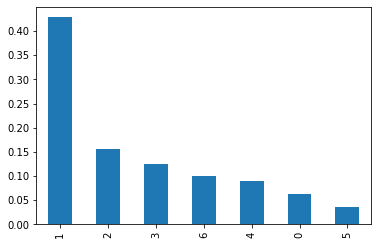

###############################

Unique Categories: [0 1]
Most freq Category: 0
Nan's (relative): 0.0%
Name: cellar, dtype: int64


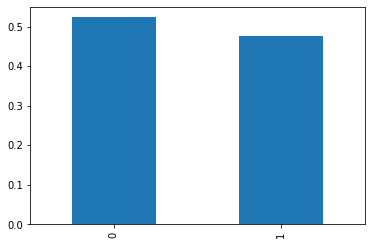

###############################

Unique Categories: [0 1 5 3 4]
Most freq Category: 0
Nan's (relative): 0.0%
Name: condition, dtype: int64


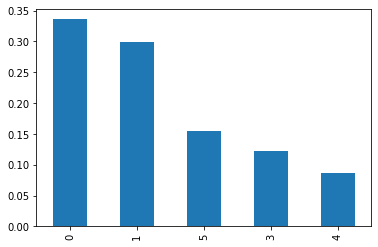

###############################

Unique Categories: [0 6 4 5 2 1 3 7 8 9]
Most freq Category: 0
Nan's (relative): 0.0%
Name: energyEfficiencyClass, dtype: int64


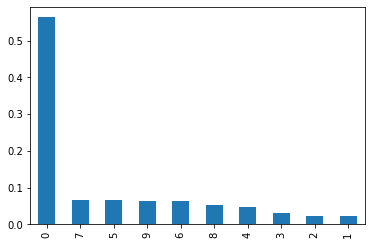

###############################

Unique Categories: [1 5 3 0 2 4]
Most freq Category: 1
Nan's (relative): 0.0%
Name: firingTypes, dtype: int64


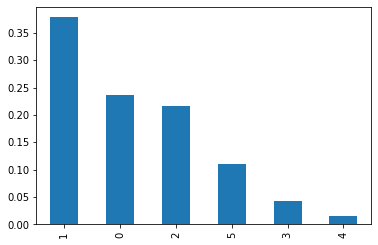

###############################

Unique Categories: [1 7 2 5 6 0 3 4]
Most freq Category: 1
Nan's (relative): 0.0%
Name: heatingType, dtype: int64


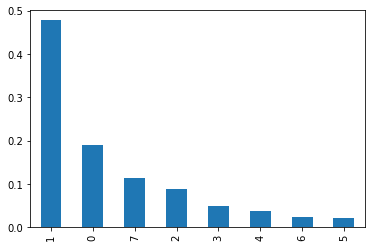

###############################

Unique Categories: [2 0 1 3]
Most freq Category: 0
Nan's (relative): 0.0%
Name: interiorQual, dtype: int64


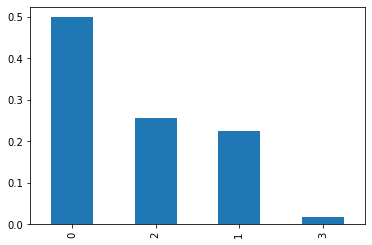

###############################

Unique Categories: [0 1]
Most freq Category: 0
Nan's (relative): 0.0%
Name: rented, dtype: int64


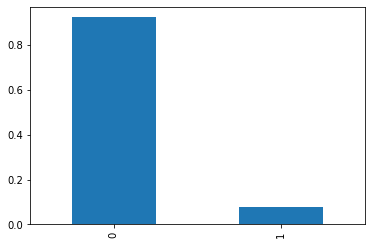

###############################



In [89]:
for column_name in categorial_columns:
    univariant_analysis_categorial(df_cleaned, column_name)
    print('###############################\n')

# Save Cleaned Dataset

In [90]:
df_cleaned.to_csv(path+'final_cleaned_dataset.csv', index=False)